# spam classification

`POINT TO REMEMBER`
- if your data contains only text then you cannot apply machine learning model directly on it. 
- you have to convert it into numerical form.
- You will perform `Feature extraction` on the Dataset
- Feature Extraction is the process of converting data into numerical form.
  - In scikit-learn, we have 2 classes for this purpose 
  - `CountVectorizer` 
  - `TfidfVectorizer`

### CountVectorizer Demo

In [85]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [86]:
data = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vec = CountVectorizer()
X = vec.fit_transform(data)

In [87]:
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [88]:
print(vec.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [89]:
print(vec.vocabulary_)

{'this': 8, 'is': 3, 'the': 6, 'first': 2, 'document': 1, 'second': 5, 'and': 0, 'third': 7, 'one': 4}


In [90]:
print(vec.transform(["this is a test document"]).toarray())
print(vec.transform(["eat your food"]).toarray())
print(vec.transform(["document this, document that, everything is a document"]).toarray())

[[0 1 0 1 0 0 0 0 1]]
[[0 0 0 0 0 0 0 0 0]]
[[0 3 0 1 0 0 0 0 1]]


### TfidfVectorizer Demo

formula for `tfidf` is
```
term frequency = (Number of times term t appears in a document)/(Number of terms in the document)
inverse document frequency = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
```

```
TF-IDF = term frequency * inverse document frequency
```

In [91]:
import numpy as np

np.set_printoptions(precision=2) # to make output more readable

In [92]:
vec = TfidfVectorizer()
X = vec.fit_transform(data)
print(X.toarray())
print(vec.get_feature_names_out())
print(vec.transform(["this is a test document"]).toarray())
print(vec.transform(["eat your food"]).toarray())
print(vec.transform(["document this, document that, everything is a document"]).toarray())

[[0.   0.47 0.58 0.38 0.   0.   0.38 0.   0.38]
 [0.   0.69 0.   0.28 0.   0.54 0.28 0.   0.28]
 [0.51 0.   0.   0.27 0.51 0.   0.27 0.51 0.27]
 [0.   0.47 0.58 0.38 0.   0.   0.38 0.   0.38]]
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[[0.   0.65 0.   0.53 0.   0.   0.   0.   0.53]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.   0.93 0.   0.25 0.   0.   0.   0.   0.25]]


## Spam Detection

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*PANDAS PARAMETERS*

- `encoding` - for fixing the encoding error
- `usecols` - for selecting only the columns we need
- `names` - for renaming the columns
- `header` - for skipping the header in this case

In [94]:
df = pd.read_csv("../datasets/spam.csv", encoding='latin-1', 
        usecols=[0,1], names=['label', 'message'], header=0)
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<Axes: xlabel='label', ylabel='count'>

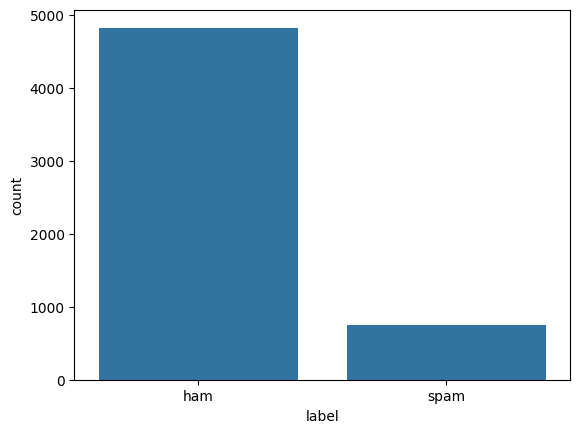

In [95]:
sns.countplot(data=df, x='label')

In [96]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.inspection import DecisionBoundaryDisplay

In [97]:
X, y = df['message'], df['label']
le = LabelEncoder()
y = le.fit_transform(y)

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



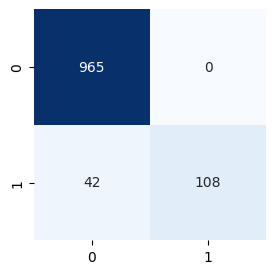

In [98]:
clf = Pipeline(steps=[
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])
Xtrain,Xtest,ytrain,ytest = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(ytest, ypred), annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
print(classification_report(ytest, ypred, target_names=le.classes_))
plt.show()

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.81      0.90       150

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



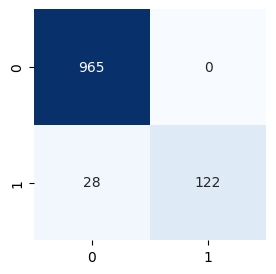

In [99]:
clf = Pipeline(steps=[
    ('vectorizer', TfidfVectorizer()),
    ('classifier', BernoulliNB())
])
Xtrain,Xtest,ytrain,ytest = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(ytest, ypred), annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
print(classification_report(ytest, ypred, target_names=le.classes_))
plt.show()

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



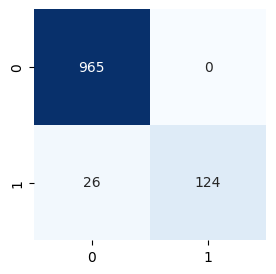

In [100]:
clf = Pipeline(steps=[
    ('vectorizer', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=50))
])
Xtrain,Xtest,ytrain,ytest = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(ytest, ypred), annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
print(classification_report(ytest, ypred, target_names=le.classes_))
plt.show()

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



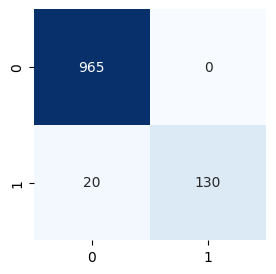

In [101]:
clf = Pipeline(steps=[
    ('vectorizer', TfidfVectorizer()),
    ('classifier', SVC())
])
Xtrain,Xtest,ytrain,ytest = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(ytest, ypred), annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
print(classification_report(ytest, ypred, target_names=le.classes_))
plt.show()